# London - Milestone Project
This project is based on a Kaggle dataset:
https://www.kaggle.com/edenau/london-bike-sharing-system-data

You actually have to retrieve to CSV files there **yourselves**!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [2]:
# This won't work for you - at least not directly!
df_stations = pd.read_csv("Data/stations.csv", index_col="Station ID")
df_journeys = pd.read_csv("Data/journeys.csv")

In [3]:
df_journeys.describe()

,Journey Duration,Journey ID,End Date,End Month,End Year,End Hour,End Minute,End Station ID,Start Date,Start Month,Start Year,Start Hour,Start Minute,Start Station ID
count,1.542844e+06,1.542844e+06,1.542844e+06,1.542844e+06,1542844.0,1.542844e+06,1.542844e+06,1.542844e+06,1.542844e+06,1.542844e+06,1542844.0,1.542844e+06,1.542844e+06,1.542844e+06
mean,1.328576e+03,7.956525e+03,1.380986e+01,8.363004e+00,17.0,1.399076e+01,2.982176e+01,3.646432e+02,1.380797e+01,8.362890e+00,17.0,1.375762e+01,2.948512e+01,3.670164e+02
std,6.718370e+03,4.485032e+03,8.444292e+00,4.808660e-01,0.0,4.969507e+00,1.742580e+01,2.377401e+02,8.445232e+00,4.808335e-01,0.0,4.901994e+00,1.724928e+01,2.375359e+02
min,0.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00,17.0,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00,17.0,0.000000e+00,0.000000e+00,1.000000e+00
25%,5.100000e+02,4.104000e+03,7.000000e+00,8.000000e+00,17.0,1.000000e+01,1.500000e+01,1.620000e+02,7.000000e+00,8.000000e+00,17.0,9.000000e+00,1.400000e+01,1.640000e+02
50%,8.470000e+02,8.028000e+03,1.300000e+01,8.000000e+00,17.0,1.500000e+01,3.000000e+01,3.260000e+02,1.300000e+01,8.000000e+00,17.0,1.400000e+01,3.000000e+01,3.310000e+02
75%,1.346000e+03,1.206300e+04,1.900000e+01,9.000000e+00,17.0,1.800000e+01,4.500000e+01,5.680000e+02,1.900000e+01,9.000000e+00,17.0,1.800000e+01,4.400000e+01,5.690000e+02
max,1.984700e+06,1.511100e+04,3.100000e+01,9.000000e+00,17.0,2.300000e+01,5.900000e+01,8.260000e+02,3.100000e+01,9.000000e+00,17.0,2.300000e+01,5.900000e+01,8.260000e+02


In [4]:
df_stations.describe()

,Capacity,Latitude,Longitude
count,773.000000,773.000000,773.000000
mean,26.725744,51.506017,-0.129055
std,9.102031,0.020103,0.055362
min,10.000000,51.454752,-0.236769
25%,20.000000,51.493146,-0.173656
50%,25.000000,51.509224,-0.131213
75%,32.000000,51.520962,-0.092940
max,64.000000,51.549369,-0.002275


### Checking Missing Values

In [5]:
df_stations[df_stations.isna().any(axis=1)]

,Capacity,Latitude,Longitude,Station Name
Station ID,,,,


In [6]:
df_journeys[df_journeys.isna().any(axis=1)]

,Journey Duration,Journey ID,End Date,End Month,End Year,End Hour,End Minute,End Station ID,Start Date,Start Month,Start Year,Start Hour,Start Minute,Start Station ID


In [7]:
df_journeys

,Journey Duration,Journey ID,End Date,End Month,End Year,End Hour,End Minute,End Station ID,Start Date,Start Month,Start Year,Start Hour,Start Minute,Start Station ID
0,2040.0,953,19,9,17,18,0,478,19,9,17,17,26,251
1,1800.0,12581,19,9,17,15,21,122,19,9,17,14,51,550
2,1140.0,1159,15,9,17,17,1,639,15,9,17,16,42,212
3,420.0,2375,14,9,17,12,16,755,14,9,17,12,9,163
4,1200.0,14659,13,9,17,19,33,605,13,9,17,19,13,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542839,270.0,5296,8,8,17,0,2,32,7,8,17,23,58,42
1542840,911.0,12348,8,8,17,0,13,625,7,8,17,23,58,222
1542841,447.0,8303,8,8,17,0,7,453,7,8,17,23,59,130
1542842,424.0,12038,8,8,17,0,6,405,7,8,17,23,59,755


#### London Coordinates
51.5074° N, 0.1278° W

Make sure to correctly convert **N** and **W** when using with a map.

### 1a) Plot Journey Durations
In your journey data, you have the journey duration for all trips. Play around with the plotting tools we talked about - do **journey durations depend on the time of day?**

In [8]:
#just look at these journeys with a duration lower than 1800 sec
short_journeyDurations = df_journeys[df_journeys["Journey Duration"]<900]
short_journeyDurations["Start Month"].unique()


array([9, 8], dtype=int64)

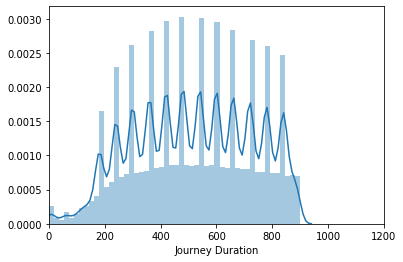

In [9]:
sns.distplot(short_journeyDurations["Journey Duration"],bins=50)
plt.xlim(0,1200)
plt.show()

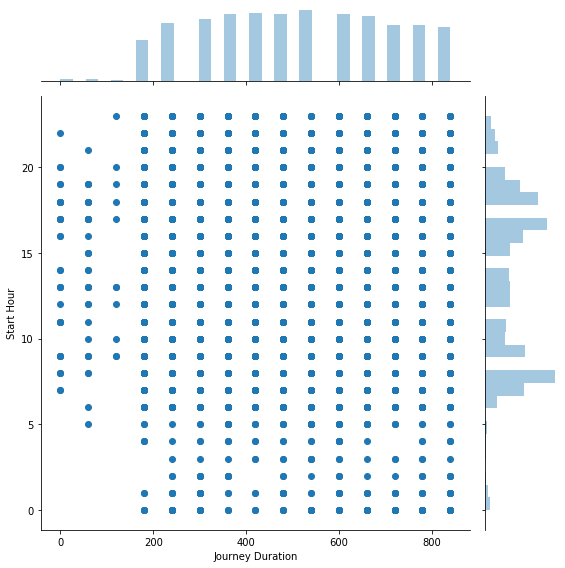

In [10]:
sns.jointplot(short_journeyDurations["Journey Duration"].head(10000), short_journeyDurations["Start Hour"].head(10000),height=8, kind="scatter")
plt.show()

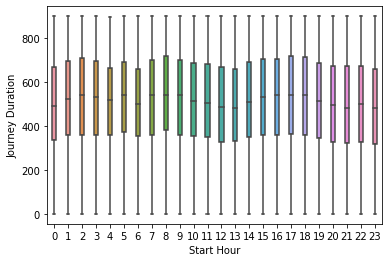

In [11]:
sns.boxplot(short_journeyDurations["Start Hour"],short_journeyDurations["Journey Duration"], width=0.3 )
plt.show()

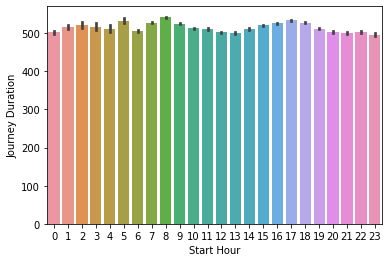

In [12]:
sns.barplot(short_journeyDurations["Start Hour"], short_journeyDurations["Journey Duration"])
plt.show()

###### --> No dependency between journey duration and time of day

### 1b) Predict Journey Durations
You have lot's of information for the trip. Use just the data that is known at the beginning of the trip (i.e., start time and start station) to predict the journy duration. Use any regression model your a comfortable with.

In [13]:
df_journeys.head()

,Journey Duration,Journey ID,End Date,End Month,End Year,End Hour,End Minute,End Station ID,Start Date,Start Month,Start Year,Start Hour,Start Minute,Start Station ID
0,2040.0,953,19,9,17,18,0,478,19,9,17,17,26,251
1,1800.0,12581,19,9,17,15,21,122,19,9,17,14,51,550
2,1140.0,1159,15,9,17,17,1,639,15,9,17,16,42,212
3,420.0,2375,14,9,17,12,16,755,14,9,17,12,9,163
4,1200.0,14659,13,9,17,19,33,605,13,9,17,19,13,36


In [14]:
df_stations.reset_index(inplace=True)
df_stations

,Station ID,Capacity,Latitude,Longitude,Station Name
0,1,19,51.529163,-0.109970,"River Street , Clerkenwell"
1,2,37,51.499606,-0.197574,"Phillimore Gardens, Kensington"
2,3,32,51.521283,-0.084605,"Christopher Street, Liverpool Street"
3,4,23,51.530059,-0.120973,"St. Chad's Street, King's Cross"
4,5,27,51.493130,-0.156876,"Sedding Street, Sloane Square"
...,...,...,...,...,...
768,190,21,51.489975,-0.132845,"Rampayne Street, Pimlico"
769,194,56,51.504627,-0.091773,"Hop Exchange, The Borough"
770,195,30,51.507244,-0.106237,"Milroy Walk, South Bank"
771,196,17,51.503688,-0.098497,"Union Street, The Borough"


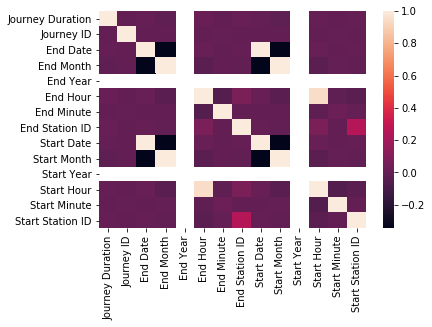

In [15]:
sns.heatmap(df_journeys.corr())
plt.show()

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

ln = LinearRegression()
X = df_journeys[["Start Date", "Start Month", "Start Hour", "Start Minute"]]
y = df_journeys[["Journey Duration"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
ln.fit(X_train, y_train)
pred = ln.predict(X_test)

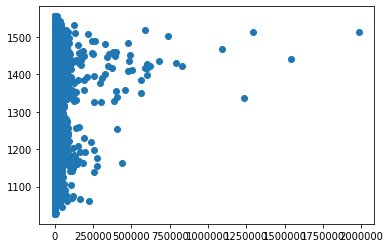

In [17]:
plt.scatter(y_test, pred)
plt.show()

In [18]:
print("Linear Regression")
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, pred)))
print("MAE: ", metrics.mean_absolute_error(y_test, pred))

Linear Regression
RMSE:  7198.665539375605
MAE:  947.790250214628


Linear Regression with Standard Scaler

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
ln.fit(X_train_scaled, y_train)
pred = ln.predict(X_test_scaled)
print("Linear Regression with Standard Scaler")
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, pred)))
print("MAE: ", metrics.mean_absolute_error(y_test, pred))

Linear Regression with Standard Scaler
RMSE:  7198.665539375605
MAE:  947.7902502146283


Ridge Regression

In [20]:
from sklearn.linear_model import Ridge
ridge = Ridge()
X = df_journeys[["Start Date", "Start Month", "Start Hour", "Start Minute"]]
y = df_journeys[["Journey Duration"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
ridge.fit(X_train, y_train)
pred = ridge.predict(X_test)
print("Ridge Regression")
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, pred)))
print("MAE: ", metrics.mean_absolute_error(y_test, pred))

Ridge Regression
RMSE:  6821.442459337913
MAE:  943.2537686204032


Lasso Regression

In [21]:
from sklearn.linear_model import Lasso
lasso = Lasso()
X = df_journeys[["Start Date", "Start Month", "Start Hour", "Start Minute"]]
y = df_journeys[["Journey Duration"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
lasso.fit(X_train, y_train)
pred = lasso.predict(X_test)
print("Lasso Regression")
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, pred)))
print("MAE: ", metrics.mean_absolute_error(y_test, pred))

Lasso Regression
RMSE:  5798.891538882968
MAE:  939.1282539928204


### 2a) Stations
In the "Folium" Notebook, I showed you how to create a colored map with some data. Try to create a similar map using the number of stations in the different boroughs of London (provided as GeoJson in this folder)

In [22]:
df_stations

,Station ID,Capacity,Latitude,Longitude,Station Name
0,1,19,51.529163,-0.109970,"River Street , Clerkenwell"
1,2,37,51.499606,-0.197574,"Phillimore Gardens, Kensington"
2,3,32,51.521283,-0.084605,"Christopher Street, Liverpool Street"
3,4,23,51.530059,-0.120973,"St. Chad's Street, King's Cross"
4,5,27,51.493130,-0.156876,"Sedding Street, Sloane Square"
...,...,...,...,...,...
768,190,21,51.489975,-0.132845,"Rampayne Street, Pimlico"
769,194,56,51.504627,-0.091773,"Hop Exchange, The Borough"
770,195,30,51.507244,-0.106237,"Milroy Walk, South Bank"
771,196,17,51.503688,-0.098497,"Union Street, The Borough"


In [23]:
import folium
m = folium.Map(location = [51.509865, -0.118092], zoom_start=9.5)
folium.Choropleth(geo_data=f"Data/boroughs.geojson").add_to(m)

folium.Marker([0.197574,51.499606]).add_to(m)# , popup="hi").add_to(m)
#for i in range(0,len(df_stations)):
 #   folium.Marker([df_stations.iloc[i]['Longitude'],df_stations.iloc[i]['Latitude']] , popup=df_stations.iloc[i]['Station Name']).add_to(m)
    
m

### 2b) Coordinates
You know the stations' coordinates. Try to add two new columns to the journey DataFrame - Start Coordinate and End Coordinate

In [24]:
#df_journeys.reset_index(inplace=True)
df_merge = pd.merge(df_journeys, df_stations, left_on="Start Station ID", right_on="Station ID")
df_merge.drop("Station ID", inplace=True, axis=1)
df_merge.rename(
    {"Latitude": "Start Latitude", "Capacity":"Start Station Capacity", 
     "Longitude": "Start Longitude", "Station Name": "Start Station Name"},
    axis = 1, inplace=True)

df_merge = pd.merge(df_merge, df_stations, left_on="End Station ID", right_on="Station ID")
df_merge.drop("Station ID", inplace=True, axis=1)
df_merge.rename(
    {"Latitude": "End Latitude", "Capacity":"End Station Capacity", 
     "Longitude": "End Longitude", "Station Name": "End Station Name"},
    axis = 1, inplace=True)


### 2c) Predict direction
Knowing the coordinate you can calculate it's distance to the city center. Create two more columns in your journey DataFrame, Start Distance and End Distance. Based on these, create another column - direction - that indicates whether the journey is inbound (i.e., towards the city center), or outbound.
Use this column as target for a binary classification. As features, use only start time and start distance!

Center of London 
Longitude: -0.118092
Latitude: 51.509865

In [29]:
from vincenty import vincenty
#for i, rows in df_merge.iterrows(): 
 #   if i > 10: 
  #      break; 
   # df_merge.iloc[i]["Start Distance"] = vincenty([51.509865,-0.118092], 
    #(df_merge.iloc[i]["Start Latitude"], df_merge.iloc[i]["Start Longitude"]))


#df_merge["Start Distance"] = vincenty([51.509865,-0.118092], (df_merge["Start Latitude"], df_merge["Start Longitude"]))
df_merge["Start Distance"] = df_merge[["Start Latitude", "Start Longitude"]].apply(lambda x: vincenty((x[0], x[1]), ( 51.509865, -0.118092)), axis=1)


In [32]:
df_merge["End Distance"] = df_merge[["End Latitude", "End Longitude"]].apply(lambda x: vincenty((x[0], x[1]), ( 51.509865, -0.118092)), axis=1)

In [33]:
df_merge['Direction'] = df_merge['Start Distance'] > df_merge['End Distance'] #inbound

In [34]:
df_merge

,Journey Duration,Journey ID,End Date,End Month,End Year,End Hour,End Minute,End Station ID,Start Date,Start Month,...,Start Latitude,Start Longitude,Start Station Name,End Station Capacity,End Latitude,End Longitude,End Station Name,Start Distance,End Distance,Direction
0,2040.0,953,19,9,17,18,0,478,19,9,...,51.518908,-0.079249,"Brushfield Street, Liverpool Street",21,51.521889,-0.046670,"Stepney Green Station, Stepney",2.878016,5.135170,False
1,840.0,4611,17,9,17,10,52,478,17,9,...,51.518908,-0.079249,"Brushfield Street, Liverpool Street",21,51.521889,-0.046670,"Stepney Green Station, Stepney",2.878016,5.135170,False
2,900.0,4199,18,9,17,7,14,478,18,9,...,51.518908,-0.079249,"Brushfield Street, Liverpool Street",21,51.521889,-0.046670,"Stepney Green Station, Stepney",2.878016,5.135170,False
3,600.0,10737,15,9,17,18,38,478,15,9,...,51.518908,-0.079249,"Brushfield Street, Liverpool Street",21,51.521889,-0.046670,"Stepney Green Station, Stepney",2.878016,5.135170,False
4,840.0,6737,17,9,17,10,52,478,17,9,...,51.518908,-0.079249,"Brushfield Street, Liverpool Street",21,51.521889,-0.046670,"Stepney Green Station, Stepney",2.878016,5.135170,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1518685,600.0,2135,31,8,17,9,20,688,31,8,...,51.464370,-0.174619,"Grant Road West, Clapham Junction",28,51.460951,-0.200667,"Northfields, Wandsworth",6.405999,7.906722,False
1518686,627.0,14494,15,8,17,9,24,688,15,8,...,51.464370,-0.174619,"Grant Road West, Clapham Junction",28,51.460951,-0.200667,"Northfields, Wandsworth",6.405999,7.906722,False
1518687,579.0,14323,15,8,17,10,34,688,15,8,...,51.464370,-0.174619,"Grant Road West, Clapham Junction",28,51.460951,-0.200667,"Northfields, Wandsworth",6.405999,7.906722,False
1518688,486.0,5080,21,8,17,10,26,688,21,8,...,51.464370,-0.174619,"Grant Road West, Clapham Junction",28,51.460951,-0.200667,"Northfields, Wandsworth",6.405999,7.906722,False


In [37]:
X = df_merge[['Start Hour', 'Start Distance']]
y = df_merge['Direction']
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=3)
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
y_predict = lr.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test, y_pred=y_predict))

              precision    recall  f1-score   support

       False       0.64      0.70      0.67    312034
        True       0.65      0.58      0.62    295442

    accuracy                           0.65    607476
   macro avg       0.65      0.64      0.64    607476
weighted avg       0.65      0.65      0.64    607476



### Extra - Revisit 1b)
Using not only the start time (and Station ID), but also the start distance, does your regression for journey durations improve?

### Extra - Plotting
We have been talking quite a bit about beatiful visualizations. Try to be creative and create some! 